<h1 style="text-align:center;font-size:200%;;">Heart Attack</h1>
<h2 style="text-align:center;font-size:100%;;">Classification using DT</h2><br>
<h4 style="text-align:left;">Réaliser par  :Marouan Daghmoumi & Abderrazzak El Bourkadi & </h4>
<h4 style="text-align:left;">Encadré par  : Pr. Abdellah AZMANI</h4>

####  "Heart Attack Analysis & Prediction Dataset" est une collection d'informations médicales qui vise à analyser et prédire le risque d'attaque cardiaque chez les individus. Voici une description des différentes variables présentes dans ce jeu de données :

- **Age**: Âge du patient

- **Sex**: Sexe du patient

- **exang**: Angine induite par l'exercice (1 = oui ; 0 = non)

- **ca**: Angine induite par l'exercice (1 = oui ; 0 = non)

- **cp**: Type de douleur thoracique

  - Value 1: Angine typique
  - Value 2: Angine atypique
  - Value 3: Douleur non angineuse
  - Value 4: Asymptomatique

- **trtbps**: Pression artérielle au repos (en mm Hg)

- **chol**: Cholestérol en mg/dl obtenu via un capteur BMI

- **fbs**: Glycémie à jeun > 120 mg/dl (1 = vrai ; 0 = faux)

- **rest_ecg**: Résultats électrocardiographiques au repos

  - Value 0: Normal
  - Value 1: Présence d'anomalies de l'onde ST-T (inversions de l'onde T et/ou élévation ou dépression de > 0,05 mV)
  - Value 2: Montrant une hypertrophie ventriculaire gauche probable ou définitive selon les critères d'Estes

- **thalach**: Fréquence cardiaque maximale atteinte

- **target**: 

  - 0 = Moins de chances d'attaque cardiaque
  - 1 = Plus de chances d'attaque cardiaque


## 1. Importation des librairies

In [97]:
# Importation de la bibliothèque Seaborn pour la visualisation de données
import seaborn as sns
# Importation de la bibliothèque Matplotlib pour la création de graphiques
import matplotlib.pyplot as plt
# Importation de la bibliothèque Pandas pour la manipulation de données sous forme de DataFrame
import pandas as pd
# Importation de la fonction train_test_split de scikit-learn pour diviser le jeu de données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split
# Importation de la classe DecisionTreeClassifier de scikit-learn pour construire un modèle d'arbre de décision
from sklearn.tree import DecisionTreeClassifier
# Importation de la fonction accuracy_score de scikit-learn pour évaluer la précision du modèle
from sklearn.metrics import accuracy_score
# Importation de la classe plot_tree de scikit-learn pour visualiser l'arbre de décision
from sklearn.tree import plot_tree
# Importation de la classe SVC de scikit-learn pour construire un modèle de machine learning basé sur une machine à vecteurs de support (SVM)
from sklearn.svm import SVC
import numpy as np

## 2. Collecte des données

In [98]:
# Utilisation de Pandas pour lire un fichier CSV et créer un DataFrame
data = pd.read_csv('heart.csv')

In [99]:
# Affichage du contenu du DataFrame 'data'
print(data)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  

## 3. exploration et visualisation des données

In [100]:
# Affichage des 10 premières lignes du DataFrame 'data'
print(data.head(10))

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   
5   57    1   0     140   192    0        1       148     0      0.4    1   
6   56    0   1     140   294    0        0       153     0      1.3    1   
7   44    1   1     120   263    0        1       173     0      0.0    2   
8   52    1   2     172   199    1        1       162     0      0.5    2   
9   57    1   2     150   168    0        1       174     0      1.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  
5    0  

In [101]:
# Affichage des 10 dernier lignes du DataFrame 'data'
data.tail(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [102]:
# Affichage des dimensions du DataFrame 'data'
print(data.shape)

(303, 14)


##### Alors on a 13 features et 303 exemple

In [103]:
# Afficher le nombre d'exemples avec output égal à 0
count_output_1 = (data['output'] == 1).sum()
# Afficher le nombre d'exemples avec output égal à 1
count_output_0 = (data['output'] == 0).sum()
print(f"Le nombre d'exemples avec output égal à 0 est : {count_output_0}")
print(f"Le nombre d'exemples avec output égal à 1 est : {count_output_1}")

Le nombre d'exemples avec output égal à 0 est : 138
Le nombre d'exemples avec output égal à 1 est : 165


nombre des exemple plus de chances d'attaque cardiaque : 165
nombre des exemple moins de chances d'attaque cardiaque : 138

### 1. exploration des exemple plus de chances d'attaque cardiaque

In [104]:
# Création d'un nouveau DataFrame 'attack' contenant les lignes où 'output' est égal à 1(Plus de chances d'attaque cardiaque)
attack = data[data['output'] == 1]

In [105]:
# Affichage personnes ayant une chance d'avoir une crise cardiaque
attack

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [106]:
# Affichage du nombre de personnes ayant une chance d'avoir une crise cardiaque
print('Le nombre de personnes qui ont une chance d\'avoir une crise cardiaque est :', len(attack))

Le nombre de personnes qui ont une chance d'avoir une crise cardiaque est : 165


In [107]:
# Affichage du pourcentage de personnes ayant une chance d'avoir une crise cardiaque par rapport au total
print('Le pourcentage des personnes qui ont une chance d\'avoir une crise cardiaque est : {:.2%}'.format(len(attack) / len(data)))

Le pourcentage des personnes qui ont une chance d'avoir une crise cardiaque est : 54.46%


### 2. exploration des exemple moins de chances d'attaque cardiaque


In [108]:
# Création d'un nouveau DataFrame 'less_attack' contenant les lignes où 'output' est égal à 0
less_attack = data[data['output'] == 0]

In [109]:
#afficher personnes ayant une chance d'avoir une crise cardiaque
less_attack

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [110]:
print('Le nombre de personnes qui ont une chance d\'avoir moins de risques d\'attaque cardiaque est :', len(less_attack))

Le nombre de personnes qui ont une chance d'avoir moins de risques d'attaque cardiaque est : 138


In [111]:
print('Le pourcentage des personnes qui ont une chance d\'avoir moins de risques d\'attaque cardiaque est : {:.2%} '.format(len(less_attack) / len(data)))

Le pourcentage des personnes qui ont une chance d'avoir moins de risques d'attaque cardiaque est : 45.54% 


# 4. préparation des données pour l'entrainement  

<Axes: >

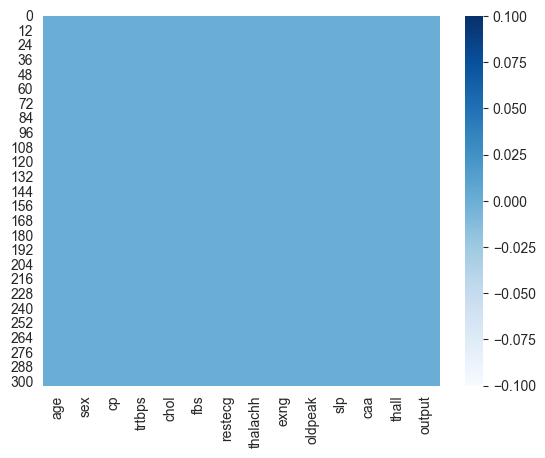

In [112]:
# affichage des données manquantes
sns.heatmap(data.isnull(), cmap = 'Blues')

les donnees son complete . 

In [113]:
# Splitting the data into features (X) and target variable (y)
X = data.drop('output', axis=1)
y = data['output']

In [114]:
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [115]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [116]:
# Splitting the data into training and testing sets
rdint = np.random.randint(0,100000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rdint)
print(rdint)

50913


In [117]:
X_train

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
63,41,1,1,135,203,0,1,132,0,0.0,1,0,1
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3
43,53,0,0,130,264,0,0,143,0,0.4,1,0,2
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
256,58,1,0,128,259,0,0,130,1,3.0,1,2,3
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2


In [118]:
X_test

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3
35,46,0,2,142,177,0,0,160,1,1.4,0,0,2
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2
82,60,0,2,102,318,0,1,160,0,0.0,2,1,2
211,61,1,0,120,260,0,1,140,1,3.6,1,1,3
262,53,1,0,123,282,0,1,95,1,2.0,1,2,3


In [119]:
# Initializing the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=rdint)

In [120]:
# Training the Decision Tree Classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=50913)

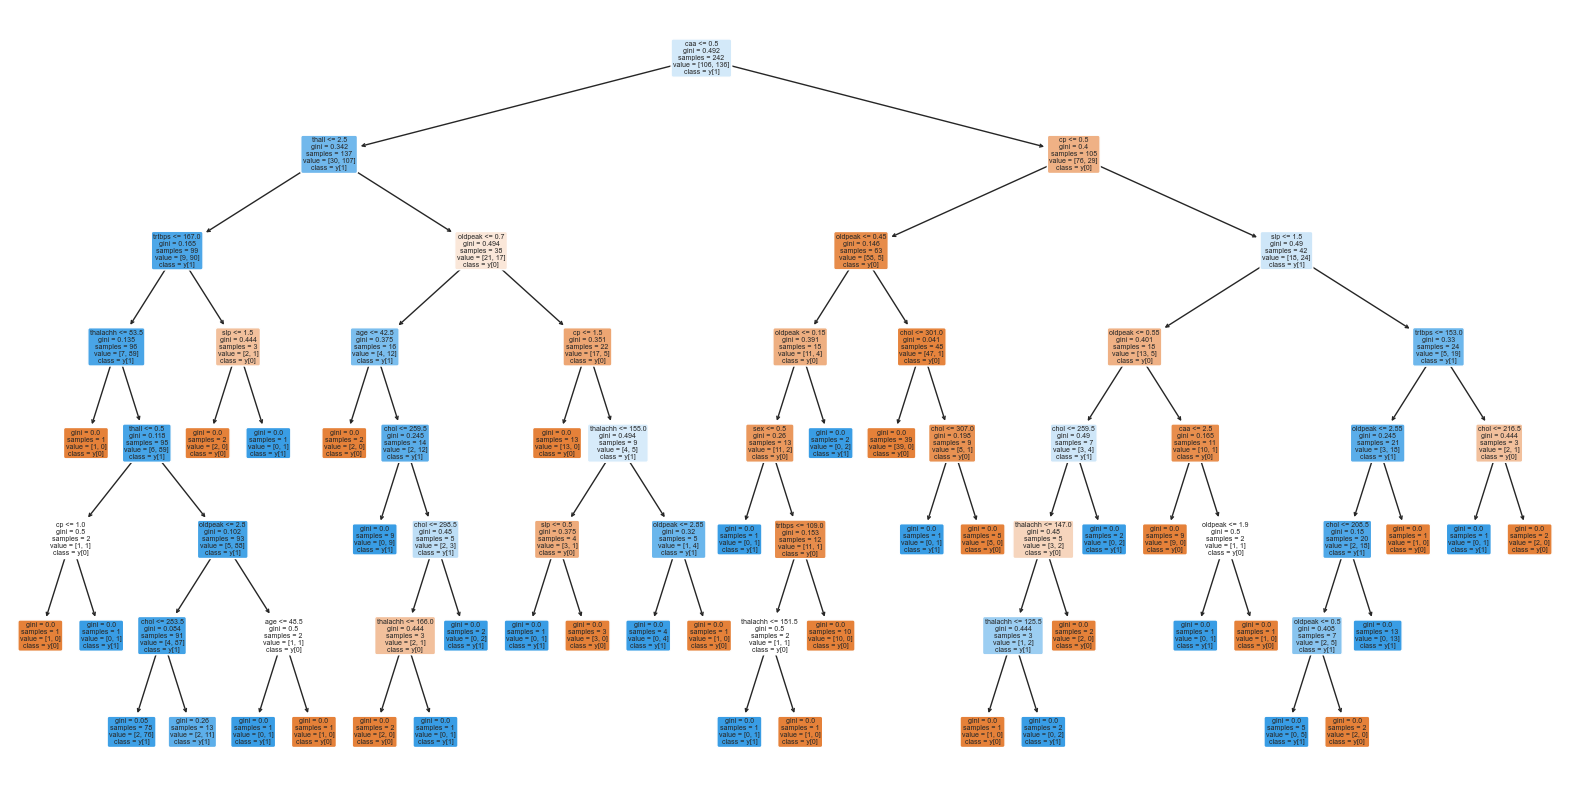

In [121]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=data.columns[:-1], class_names=True, rounded=True)
plt.show()

In [122]:
# Making predictions on the test set
y_pred = clf.predict(X_test)

In [123]:
# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 80.33%


In [124]:
# importation du modèle (régression logistique)
from sklearn.linear_model import LogisticRegression
# LogisticRegression() est une extention du modèle
Classifier = DecisionTreeClassifier()
# application de la régression logistique sur les données d'entrainement
Classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [125]:
# prédire la sortie à partir des inputs de la base de données du testing
y_predict_test = Classifier.predict(X_test)

In [126]:
# importer confusion_matrix et classification_report
from sklearn.metrics import confusion_matrix, classification_report

<Axes: >

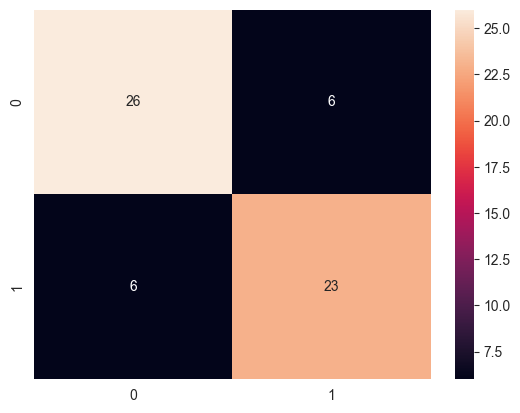

In [127]:
# matrice de confusion
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True) # annot = True pour afficher les nombres dans la matrice

In [128]:
# classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        32
           1       0.79      0.79      0.79        29

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61
